Задача: нужно предсказать доход человека (больше $50000 или меньше) по результатам переписи населения

https://archive.ics.uci.edu/dataset/2/adult

### Train data

In [88]:
import pandas as pd

columns = ['age', 'workclass', 'fnlwgt', 'education', 
           'education-num', 'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 'capital-gain', 
           'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('adult.data', 
                 header = None, 
                 names = columns,
                 na_values=' ?')

In [89]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [90]:
print(f'Размер набора данных: {df.shape}')

Размер набора данных: (32561, 15)


Чтобы не было дублирования удаляем столбец `education`, так как у нас есть кол-во лет обучения в толбце `education-num` 

In [91]:
df = df.drop('education', axis = 1)

Также преобразуем столбец `income` в бинарные значения

In [92]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [93]:
df['income'] = df['income'].map({' <=50K': 0,
                                 ' >50K' : 1})

In [94]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [95]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

у нас есть пустые занчения и так как размер набора данных достаточно большой, можно просто избавиться от них путем удаления

In [96]:
df = df.dropna()

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education-num   30162 non-null  int64 
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital-gain    30162 non-null  int64 
 10  capital-loss    30162 non-null  int64 
 11  hours-per-week  30162 non-null  int64 
 12  native-country  30162 non-null  object
 13  income          30162 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 3.5+ MB


### Test data

повторяем манипуляции для этой выборки

In [98]:
test_df = pd.read_csv('adult.test',
                      header = None,
                      names = columns, 
                      na_values = ' ?',
                      skiprows = 1)

In [99]:
print(f'Размер набора данных: {test_df.shape}')

Размер набора данных: (16281, 15)


In [100]:
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [101]:
test_df = test_df.drop('education', axis = 1)
test_df['income'] = test_df['income'].map({' <=50K.': 0,
                                           ' >50K.' : 1})

In [102]:
test_df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


In [103]:
test_df = test_df.dropna()

In [104]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15060 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15060 non-null  int64 
 1   workclass       15060 non-null  object
 2   fnlwgt          15060 non-null  int64 
 3   education-num   15060 non-null  int64 
 4   marital-status  15060 non-null  object
 5   occupation      15060 non-null  object
 6   relationship    15060 non-null  object
 7   race            15060 non-null  object
 8   sex             15060 non-null  object
 9   capital-gain    15060 non-null  int64 
 10  capital-loss    15060 non-null  int64 
 11  hours-per-week  15060 non-null  int64 
 12  native-country  15060 non-null  object
 13  income          15060 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.7+ MB


### Данные


Смотрим на распределение клаасов в итоговой переменной (отклике)

In [105]:
df['income'].value_counts(normalize=True)

income
0    0.751078
1    0.248922
Name: proportion, dtype: float64

Обратим внимание на то, что в наборе данных присутвует большое кол-во категориальных признаков и от них нужно избавиться. 

В данном случае над всеми категориальными признаками применим метод `One-Hot-encoding`, в этом методе каждое уникальное значение признака получает свой столбец, который заполняется значениеми: в случае отсутствия уникального значения ставится `0` иначе  `1`.

In [106]:
X = df.drop('income', axis = 1)
y = df['income']

X_test = test_df.drop('income', axis = 1)
y_test = test_df['income']

print(f'X: {X.shape} \ny: {y.shape}\
       \nX_test: {X_test.shape} \ny_test: {y_test.shape}')

X: (30162, 13) 
y: (30162,)       
X_test: (15060, 13) 
y_test: (15060,)


In [107]:
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

In [108]:
print(f'X: {X.shape}\nX_test: {X_test.shape}')

X: (30162, 88)
X_test: (15060, 87)


Замечаем, что признаки закодировались не совсем так как мы хотели и мы получили в обучающей выборке 88 признаков, а в тестовой 87. Найдем значение закодированного призака которое не попало в тестовую выборку и из-за чего не создался столбец.

In [109]:
print(set(X.columns) - set(X_test.columns))
print(set(X_test.columns) - set(X.columns))

{'native-country_ Holand-Netherlands'}
set()


Теперь можно исправить этот недочет. Создаем полный список всех колонок (из трейна и из теста) и переиндексируем, то есть сделаем так, чтобы столбцы соответствовали столбцам, указанным в списке колонок. Если будут отсутствовать столбцы из columns, они будут добавлены с пропущенными значениями (NaN). В нашем случае это будет столбец "native-country_ Holand-Netherlands".

In [110]:
X_columns = set(X.columns) | set(X_test.columns)

X = X.reindex(columns=X_columns).fillna(0)
X_test = X_test.reindex(columns=X_columns).fillna(0)

In [111]:
print(f'X: {X.shape}\nX_test: {X_test.shape}')
print(set(X.columns) == set(X_test.columns))

X: (30162, 88)
X_test: (15060, 88)
True


Отметим, что с деревьями стандартизация ничего не улучшает и ничего не уменьшает, поэтому смысла ее делать не много.
кроме всей проделланной предобработки, можно подобавлять новых признаков, которые будут являться, например объединением каких-то значений иных признаков.

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                      y, 
                                                      test_size = 0.2, 
                                                      random_state = 42)

print(f'X_train: {X_train.shape} \ny_train: {y_train.shape}\
       \n\nX_val: {X_valid.shape} \ny_val: {y_valid.shape}')

X_train: (24129, 88) 
y_train: (24129,)       

X_val: (6033, 88) 
y_val: (6033,)


### lightgbm


In [260]:
import lightgbm as lgb

Важные гиперпараметры LightGBM

1. Общие параметры
- `boosting_type` - Тип бустинга, который будет использоваться. Возможные значения: `gbdt`: Градиентный бустинг (по умолчанию). `dart`: Dropouts meet Multiple Additive Regression Trees. `goss`: Gradient-based One-Side Sampling.
- `objective` - Целевая функция, которую нужно оптимизировать. `binary`: Для бинарной классификации. `multiclass`: Для многоклассовой классификации. `regression`: Для регрессионных задач.

2. Параметры обучения
- `learning_rate` - Скорость обучения, которая контролирует, насколько сильно модель корректирует свои предсказания на каждой итерации. Значения обычно находятся в диапазоне от 0.01 до 0.3
- `num_iterations` - Общее количество итераций (или деревьев), которые будут построены. Чем больше итераций, тем более сложная модель, но это также может привести к переобучению
- `num_leaves` - определяет максимальное количество листьев (конечных узлов) в каждом дереве. Это основной параметр, который влияет на способность модели захватывать сложные зависимости в данных.

3. Параметры регуляризации
- `max_depth` - Максимальная глубина дерева. Ограничение глубины помогает предотвратить переобучение. Значение по умолчанию — -1 (без ограничения).
- `min_data_in_leaf` - Минимальное количество данных в листе. Этот параметр помогает контролировать переобучение, устанавливая минимальное количество образцов, необходимых для создания листа.
- `lambda_l1` - Коэффициент L1-регуляризации. Помогает уменьшить переобучение, добавляя штраф за сложность модели.
- `lambda_l2` - Коэффициент L2-регуляризации. Аналогично L1, но штрафует за большие значения параметров.

4. Параметры, связанные с данными
- `feature_fraction` - Доля признаков, которые будут использоваться для обучения каждого дерева. Это помогает предотвратить переобучение. Значения обычно находятся в диапазоне от 0.1 до 1.
- `bagging_fraction` - Доля данных, которые будут использоваться для обучения каждого дерева. Это также помогает предотвратить переобучение.
- `bagging_freq` - Частота, с которой будет применяться бутстрэппинг. Если значение равно 0, то бутстрэппинг не используется.

5. Параметры для контроля обучения
- `early_stopping_rounds` - Количество итераций без улучшения, после которых обучение будет остановлено. Это помогает избежать переобучения.
- `verbose` - Уровень вывода информации о процессе обучения. Значение 0 отключает вывод, 1 включает вывод информации о процессе.

In [263]:
train_data = lgb.Dataset(X_train, y_train)
valid_data = lgb.Dataset(X_valid, y_valid, reference = train_data)

params = {
    'metric' : ['auc', 'binary_error'],
    'boosting_type': 'gbdt',
    'learning_rate': 0.3,
    'feature_fraction': 0.8,
    'num_leaves': 10,
    'max_depth': 6
}

In [264]:
evals_result = {}

model = lgb.train(
    params, 
    train_data, 
    num_boost_round = 200, 
    valid_sets = [valid_data],
    callbacks = [lgb.log_evaluation(10)]
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 717
[LightGBM] [Info] Number of data points in the train set: 24129, number of used features: 74
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.247752
[10]	valid_0's auc: 0.915066	valid_0's binary_error: 0.139068
[20]	valid_0's auc: 0.921518	valid_0's binary_error: 0.133101
[30]	valid_0's auc: 0.92388	valid_0's binary_error: 0.130781
[40]	valid_0's auc: 0.924598	valid_0's binary_error: 0.129952
[50]	valid_0's auc: 0.925102	valid_0's binary_error: 0.129455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's auc: 0.925569	valid_0's binary_error

### Предсказания

In [265]:
y_test_pred = model.predict(X_test)
y_pred_bin = [1 if i > 0.5 else 0 for i in y_test_pred]

In [266]:
print(len(y_pred_bin))

print(y_pred_bin[1])
print(y_test_pred[1])

15060
0
0.2456702082998896


In [267]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_bin))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     11360
           1       0.78      0.65      0.71      3700

    accuracy                           0.87     15060
   macro avg       0.84      0.80      0.81     15060
weighted avg       0.87      0.87      0.87     15060



### Информативность переменных

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

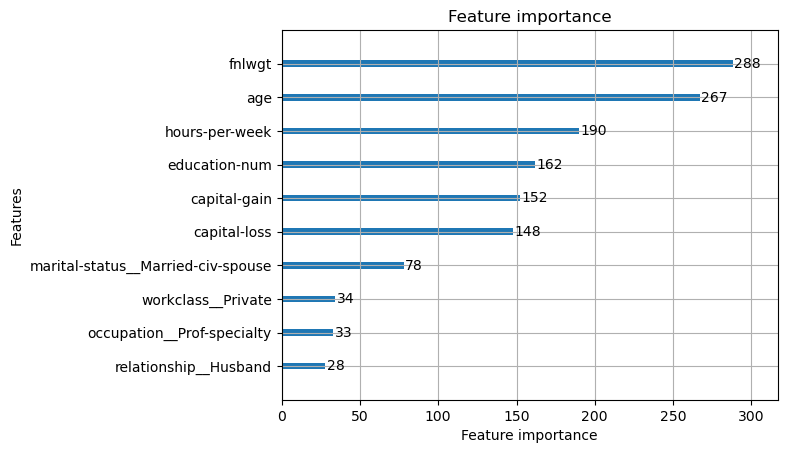

In [269]:
 lgb.plot_importance(model, max_num_features=10)